#**Analyzing Amazon Sales Data**

###**Step 1: Introduction**
**Project Overview:** This project aims to analyze Amazon sales data to extract meaningful insights and key metrics. By leveraging data analysis and visualization techniques, the project provides a deep dive into sales trends, regional performance, and product profitability.

**Objectives:**
- Extract and load Amazon sales data.
Clean and transform the data for analysis.
- Conduct exploratory data analysis (EDA) to uncover initial insights.
- Perform detailed analysis to identify key metrics and trends.
- Visualize the findings to support decision-making.

###**Step 2: Tools and Technologies**

- **Programming Languages:** Python, SQL

- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

- **Software/Platforms:** Jupyter Notebook, Tableau, Power BI

###**Step 3: Data Collection**

**Data Sources:** The dataset used in this project is obtained from Amazon sales records.

**Data Description:** The dataset includes the following columns:
- Region
- Country
- Item Type
- Sales Channel
- Order Priority
- Order Date
- Order ID
- Ship Date
- Units Sold
- Unit Price
- Unit Cost
- Total Revenue
- Total Cost
- Total Profit

###**Step 4: Data Preprocessing**

**Data Cleaning:**

- Ensured all columns have appropriate data types.
- Checked for and handled any missing values, outliers, and inconsistencies (none found in this case).

**Data Transformation:**

- Converted date columns to datetime format.
- Created new columns for month and year extracted from the Order Date.
- Calculated additional metrics such as Total Revenue, Total Cost, Total Profit, and Gross Margin.

**Exploratory Data Analysis (EDA):**

- Initial insights were derived using visualizations and descriptive statistics.

In [144]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
# Load the dataset
file_path = '/content/sample_data/Amazon Sales data.csv'
df = pd.read_csv(file_path)

In [146]:
# Display the first few rows of the dataframe
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [147]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [148]:
# Check missing values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

###**Step 5: Feature Engineering**

**New Features:**

- Extracted month and year from the Order Date.Calculated Gross Margin as a new feature for profitability analysis.

In [149]:
# Ensure date column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [150]:
# Calculate total revenue, total cost, gross profit, and gross margin if not already present
df['Total Revenue'] = df['Units Sold'] * df['Unit Price']
df['Total Cost'] = df['Units Sold'] * df['Unit Cost']
df['Total Profit'] = df['Total Revenue'] - df['Total Cost']
df['Gross Margin'] = df['Total Profit'] / df['Total Revenue']

In [151]:
# Extract month and year from order_date
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

In [152]:
# Display the updated dataframe
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Gross Margin,month,year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,0.375509,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,0.430676,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,0.193870,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,0.258307,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,0.193870,2,2013


###**Step 6: Data Analysis**

**Methods and Techniques:** Used grouping and aggregation techniques to derive metrics. Employed various visualization techniques to illustrate findings.

**Detailed Analysis:** Calculated total revenue, gross profit, and gross margin. Analyzed sales channel distribution. Conducted region-wise analysis of units sold. Analyzed sales trends on a monthly and yearly basis.

In [153]:
# Total Revenue
total_revenue = df['Total Revenue'].sum()
print("Total Revenue:",total_revenue)

Total Revenue: 137348768.31


In [154]:
# Gross Profit
gross_profit = df['Total Profit'].sum()
print('Gross Profit:',gross_profit)

Gross Profit: 44168198.39999999


In [155]:
# Gross Margin
gross_margin = df['Gross Margin'].mean()
print("Gross Margin:",gross_margin)

Gross Margin: 0.36211622856570735


In [156]:
# Average Units Sold
average_units_sold = df['Units Sold'].mean()
print("Average Units Sold:",average_units_sold)

Average Units Sold: 5128.71


In [157]:
# Sales Channel
sales_channels = df['Sales Channel'].value_counts()
sales_channels

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

In [158]:
# Region Units Sold
region_units_sold = df.groupby('Region')['Units Sold'].sum()
region_units_sold

Region
Asia                                  59967
Australia and Oceania                 68325
Central America and the Caribbean     35771
Europe                                98117
Middle East and North Africa          48678
North America                         19143
Sub-Saharan Africa                   182870
Name: Units Sold, dtype: int64

In [159]:
# Month Wise Sales
month_wise_sales = df.groupby('month')['Total Revenue'].sum()
month_wise_sales

month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64

In [160]:

# Year Wise Sales
year_wise_sales = df.groupby('year')['Total Revenue'].sum()
year_wise_sales

year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64

In [161]:

# Year Month Wise Sales
year_month_wise_sales = df.groupby(['year', 'month'])['Total Revenue'].sum().unstack()
year_month_wise_sales

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,NaN,3410661.12,NaN,NaN,2587973.26,1082418.40,NaN,NaN,NaN,6064933.75,3458252.00,2581786.39
2011,1042225.35,387002.20,NaN,2798046.49,272410.45,19103.44,97040.64,NaN,574951.92,NaN,5938385.58,NaN
2012,1012884.00,6707849.42,994765.42,4556012.38,3782781.82,2132075.27,4445093.92,576782.80,4648152.72,3042246.77,NaN,NaN
2013,NaN,3296425.02,835759.10,3262562.10,NaN,1352867.40,8545511.20,89623.98,71253.21,2702770.40,NaN,173676.25
2014,NaN,1819660.25,NaN,4510578.10,3060338.59,75591.66,688641.85,455479.04,20404.71,1352370.65,4647149.58,NaN
2015,5513227.50,2003911.12,NaN,1059987.26,NaN,NaN,1292409.45,6279.09,NaN,1904138.04,648030.40,NaN
2016,NaN,NaN,197883.40,NaN,414371.10,568269.60,600821.44,NaN,NaN,221117.00,5876405.20,4493999.48
2017,2914130.27,7115008.64,246415.95,NaN,3097864.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Step 7: Visualization**


**Month-wise sales trends**

<ipython-input-162-f4340349cfb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_wise_sales.index, y=month_wise_sales.values, palette='Set2')


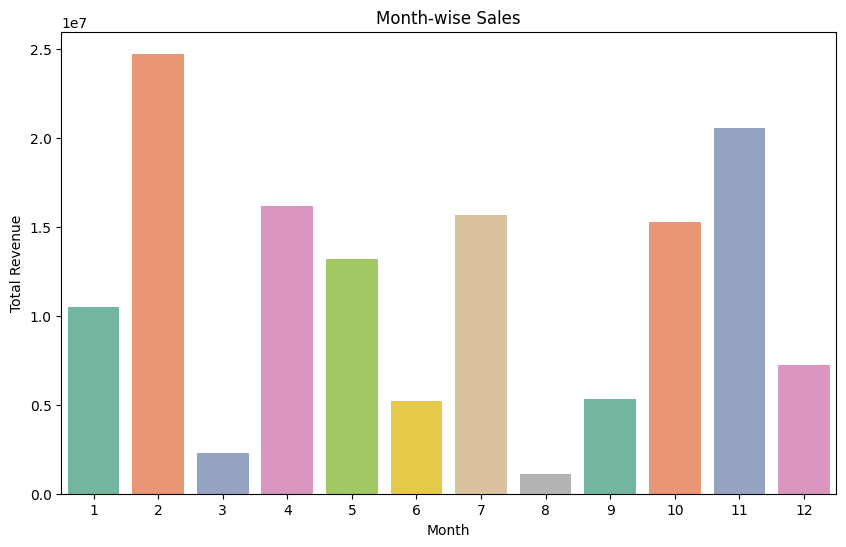

In [162]:
# Total Revenue Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=month_wise_sales.index, y=month_wise_sales.values, palette='Set2')
plt.title('Month-wise Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**Sales channel distribution**

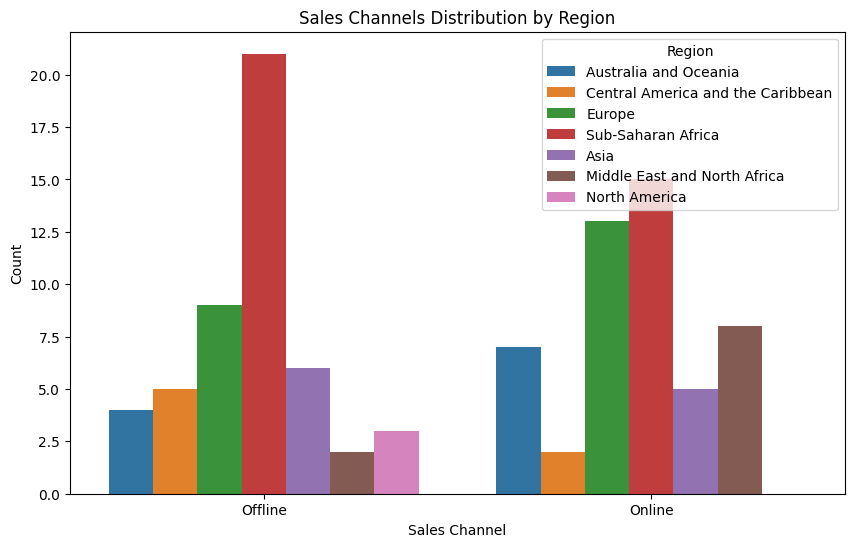

In [163]:
# Sales Channels Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales Channel', data=df, hue='Region')  # Using 'Region' as hue for multiple colors
plt.title('Sales Channels Distribution by Region')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.legend(title='Region', loc='upper right')
plt.show()

**Region-wise units sold**

<ipython-input-164-cc60de7f8b01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_units_sold.index, y=region_units_sold.values, palette='Set3')


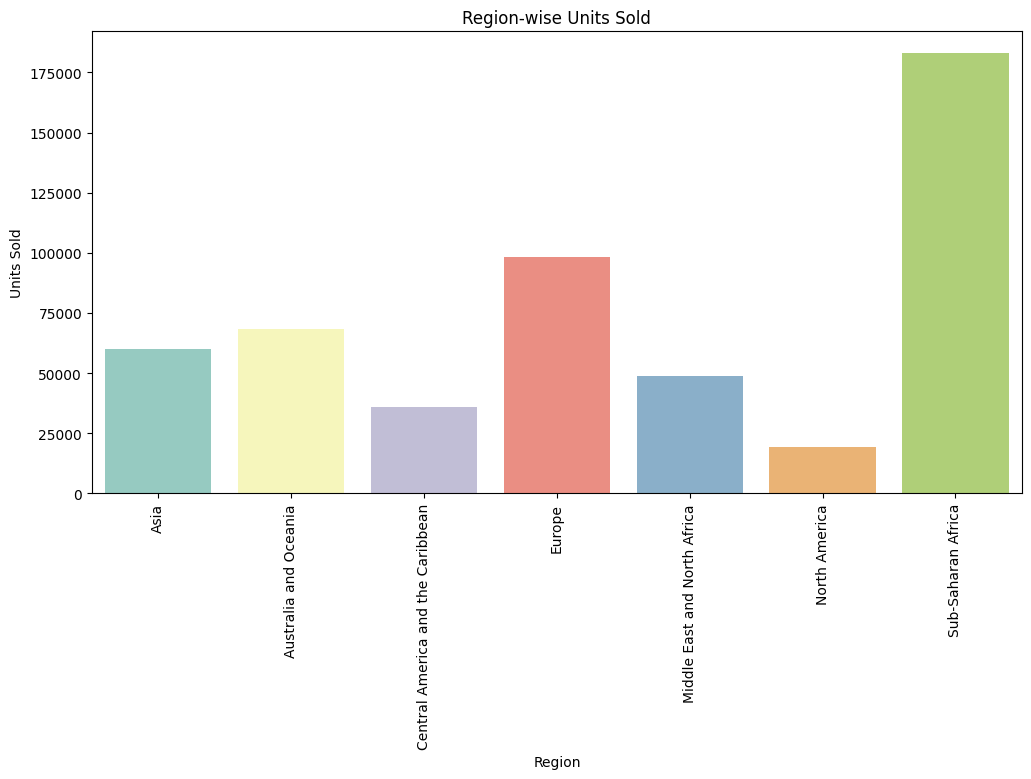

In [164]:
# Region-wise Units Sold Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=region_units_sold.index, y=region_units_sold.values, palette='Set3')
plt.title('Region-wise Units Sold')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.show()

**Year-wise sales trends**

<ipython-input-165-1c27dd020804>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_wise_sales.index, y=year_wise_sales.values, palette='magma')


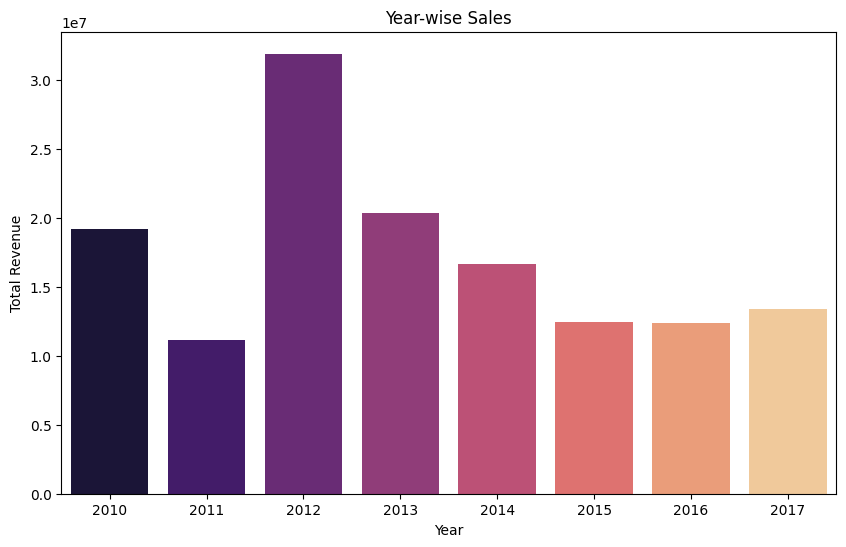

In [165]:
# Year-wise Sales Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=year_wise_sales.index, y=year_wise_sales.values, palette='magma')
plt.title('Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

**Yearly month-wise sales heatmap**

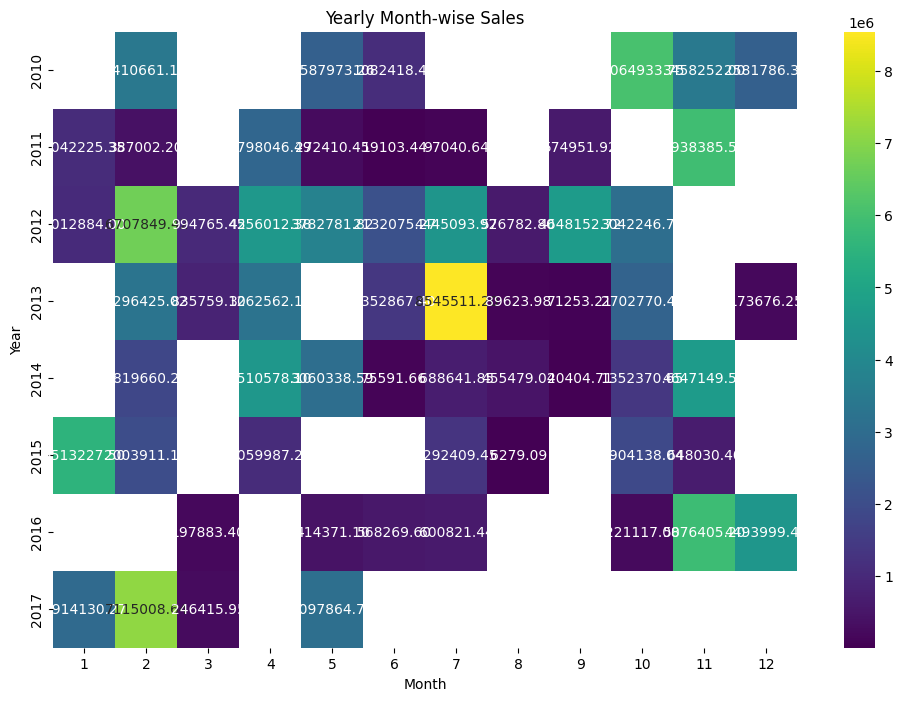

In [166]:
# Yearly Month-wise Sales Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(year_month_wise_sales, annot=True, fmt='.2f', cmap='viridis')  # Using 'viridis' colormap for multiple colors
plt.title('Yearly Month-wise Sales')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

###**Step 8: Additional Visualizations and Analysis**

**Profit Margin Analysis**

Visualize the distribution and trends of gross margins across different regions or sales channels.

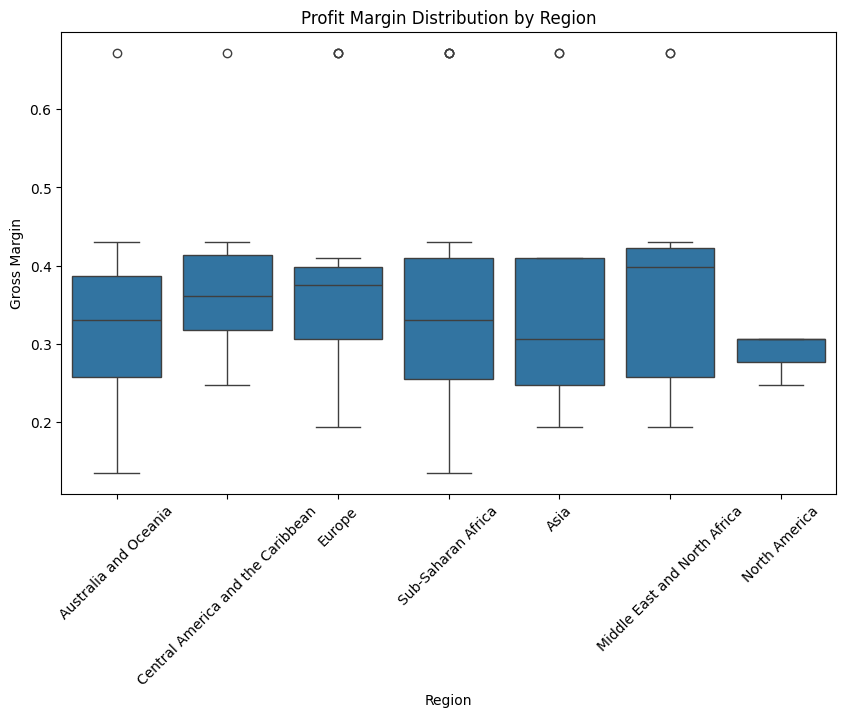

In [167]:
# Profit Margin Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Gross Margin', data=df)
plt.title('Profit Margin Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Gross Margin')
plt.xticks(rotation=45)
plt.show()

**Time Series Analysis**

Explore trends and seasonality in sales over time using time series plots.

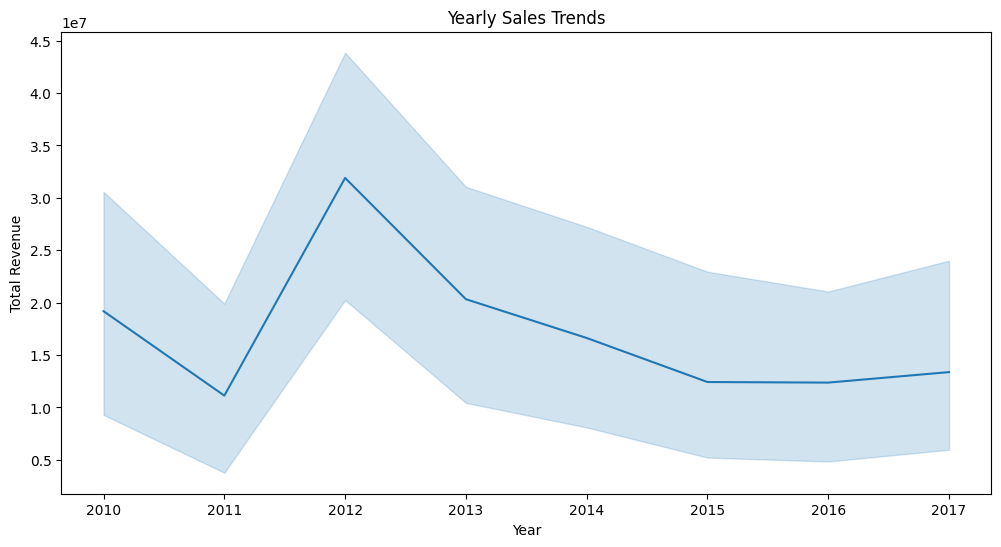

In [168]:
# Yearly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Total Revenue', data=df, estimator=np.sum)
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

<ipython-input-169-54cff0eb9ebf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='Total Revenue', hue='year', data=df, estimator=np.sum, ci=None)


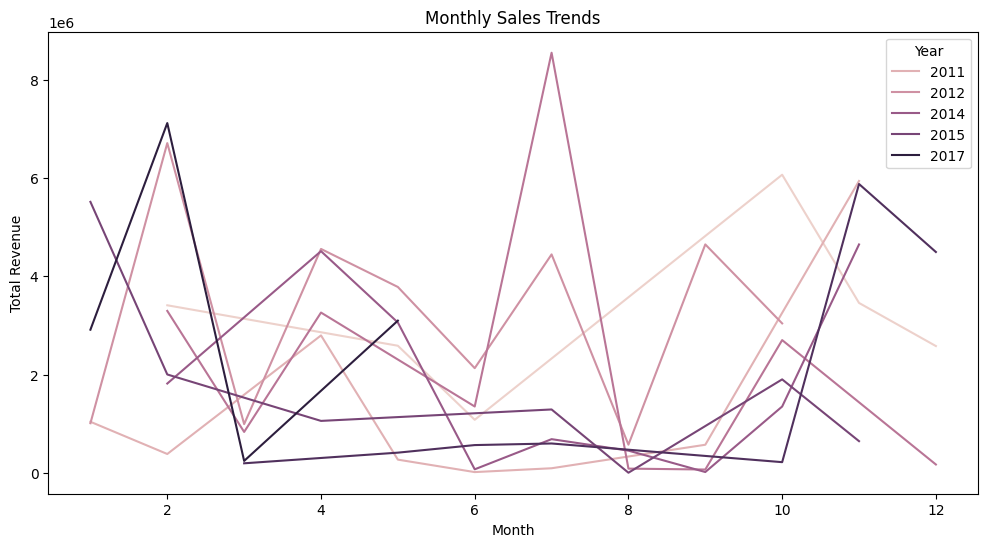

In [169]:
# Monthly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Total Revenue', hue='year', data=df, estimator=np.sum, ci=None)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.show()

**Product Performance Analysis**

Identify top-selling products and their performance metrics.

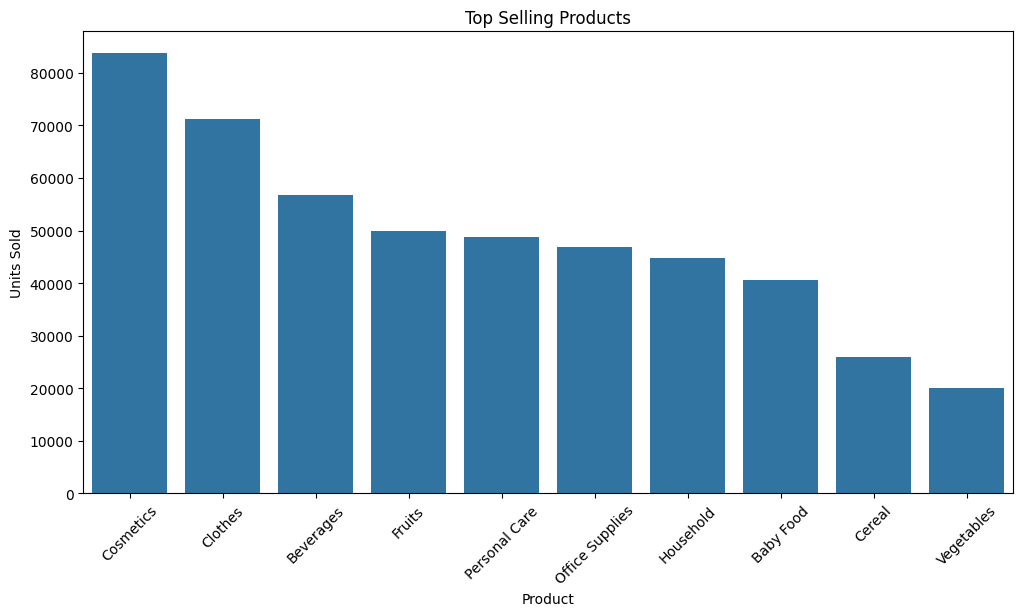

In [170]:
# Top Selling Products
top_products = df.groupby('Item Type')['Units Sold'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

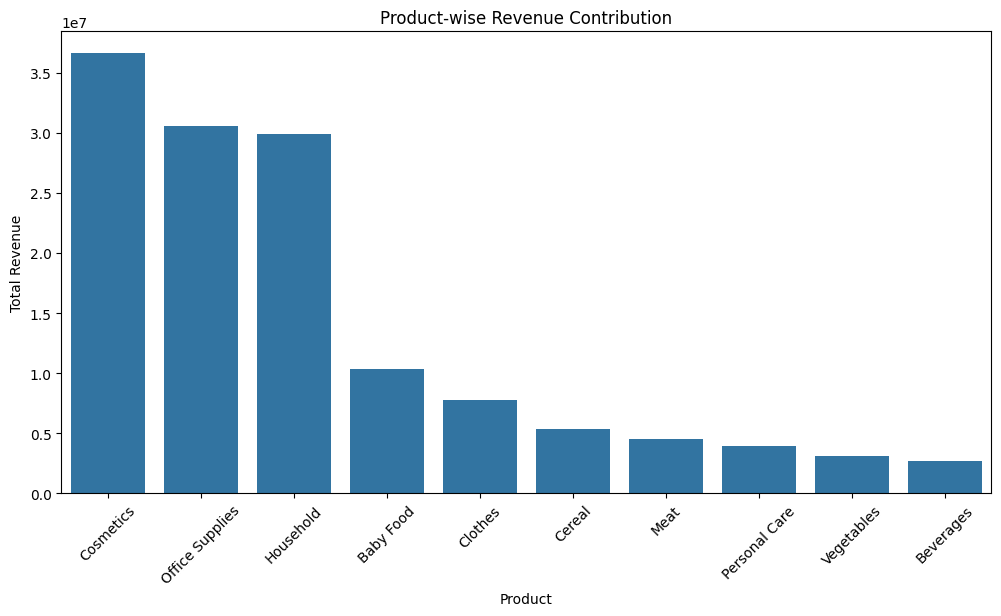

In [171]:

# Product-wise Revenue Contribution
product_revenue = df.groupby('Item Type')['Total Revenue'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.title('Product-wise Revenue Contribution')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**Customer Segmentation Analysis**

Segment customers based on their purchasing behavior and analyze their contribution to sales.

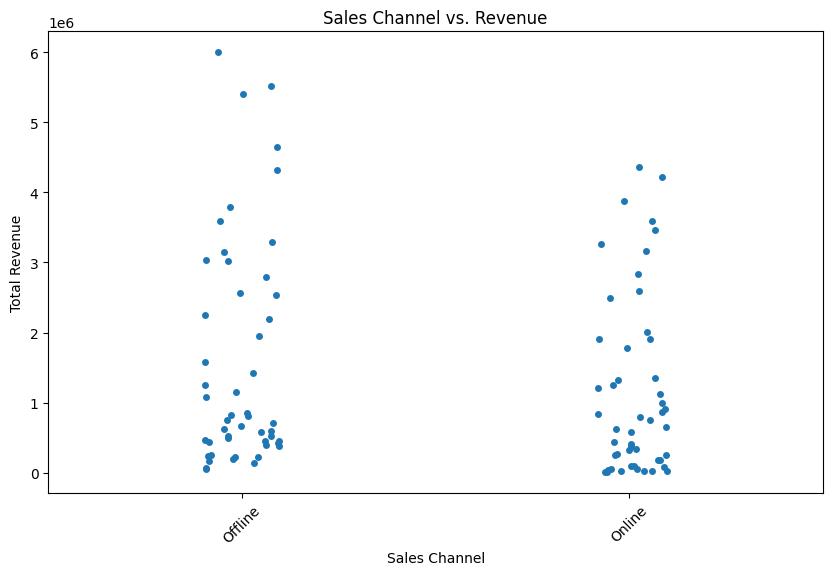

In [172]:
# Customer Segmentation: Sales Channel vs. Revenue
plt.figure(figsize=(10, 6))
sns.stripplot(x='Sales Channel', y='Total Revenue', data=df, jitter=True)
plt.title('Sales Channel vs. Revenue')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

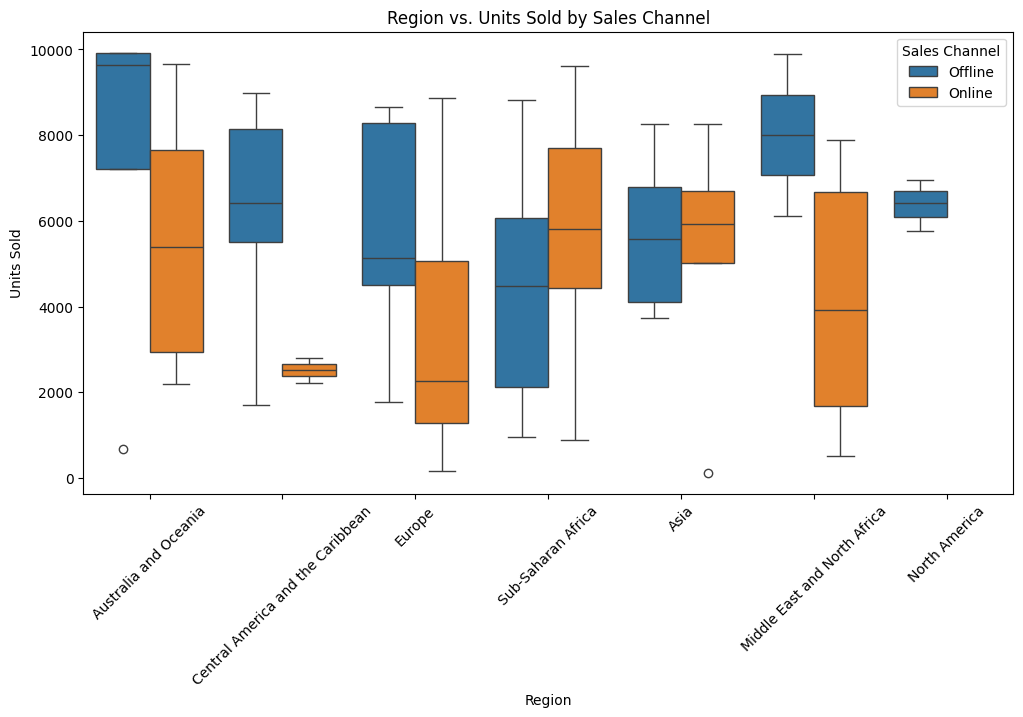

In [173]:

# Customer Segmentation: Region vs. Units Sold
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Units Sold', hue='Sales Channel', data=df)
plt.title('Region vs. Units Sold by Sales Channel')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Sales Channel')
plt.show()

**Correlation Analysis**

Explore correlations between different numerical variables in the dataset.

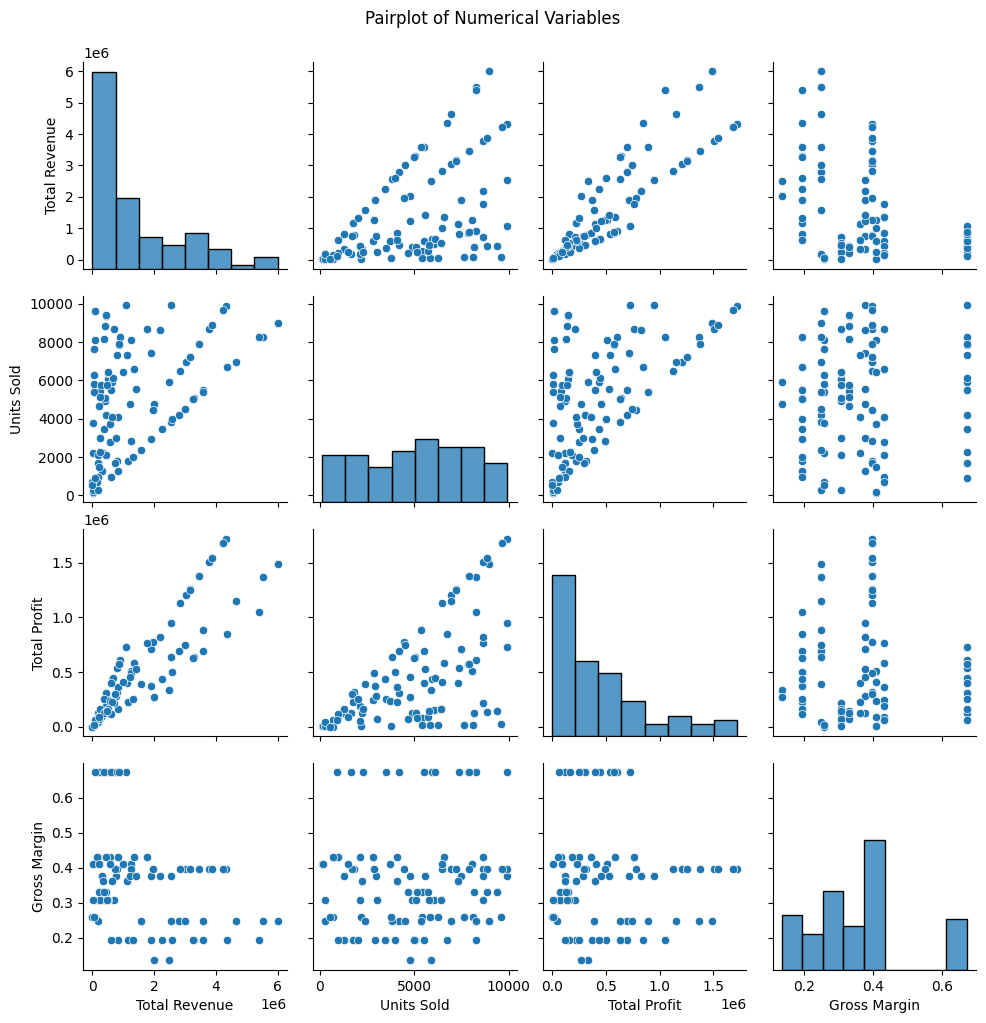

In [174]:
# Pairplot for Numerical Variables
sns.pairplot(df[['Total Revenue', 'Units Sold', 'Total Profit', 'Gross Margin']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

###**Step 9: Key Metrics and Relationships**

Analyze key metrics and relationships between attributes, such as the relationship between units sold and total revenue or the impact of the sales channel on revenue.

In [175]:
# Ensure all relevant columns are numeric
df_numeric = df.select_dtypes(include=[np.number])

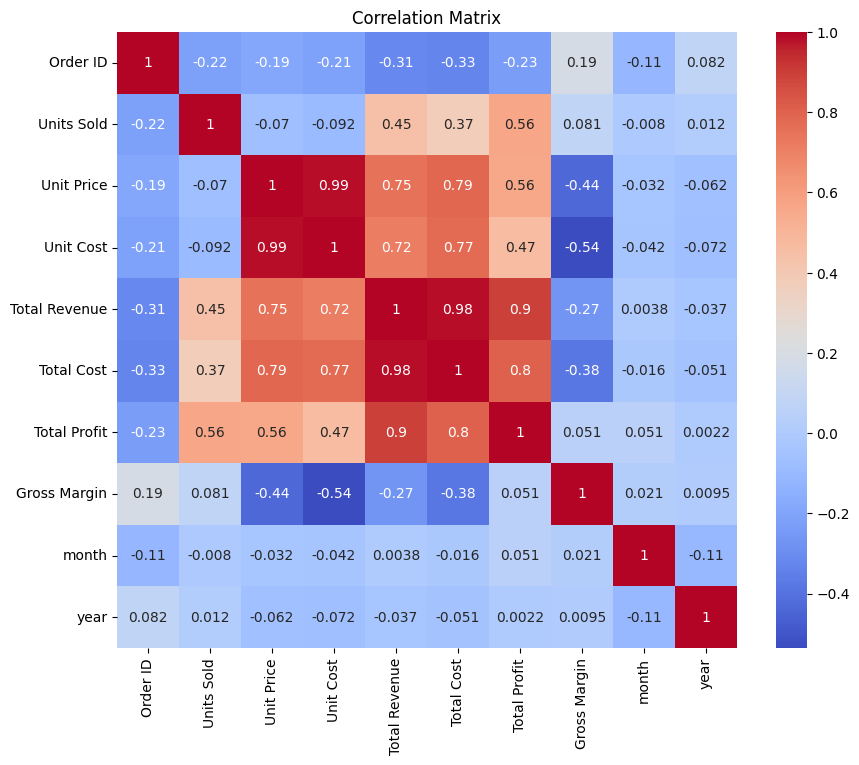

In [176]:
# Correlation Analysis
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

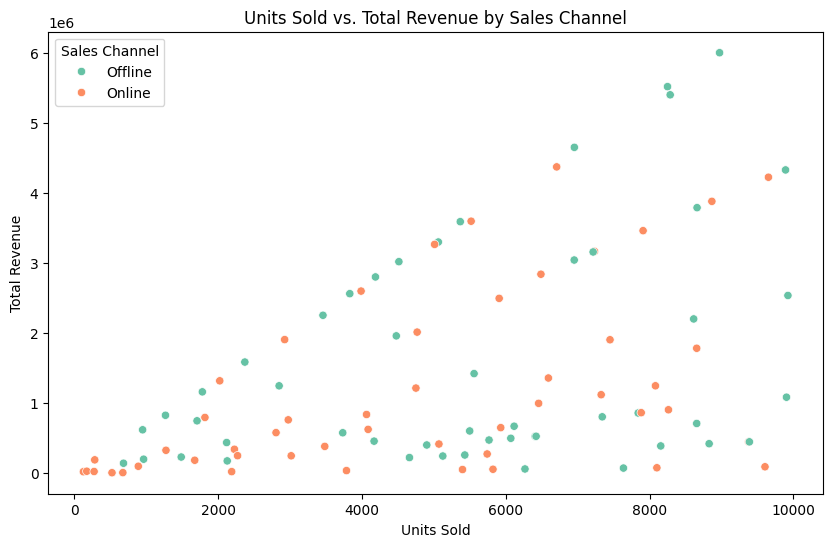

In [177]:
# Scatter plot: Units Sold vs. Total Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df, hue='Sales Channel', palette='Set2')  # Using 'Sales Channel' for multiple colors
plt.title('Units Sold vs. Total Revenue by Sales Channel')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()

###**Step 10: Results**

**Findings:**

- Total Revenue: $137,348,768.31

- Gross Profit: $44,168,198.40
- Gross Margin: 36.21%
- Average Units Sold: 5128.7110

###**Step 11: Conclusion**

**Summary:**

The project successfully analyzed Amazon sales data, uncovering important trends and metrics that can help inform business decisions.

###**Step 11: Limitations**

**Limitations:**

- Data may not capture all aspects of Amazon sales due to limitations in dataset scope.
- Analysis assumes data integrity and completeness, which may affect results if not upheld.
- External factors impacting sales (e.g., market trends, competition) are not directly accounted for in this analysis.

###***Thank Q, for your Time!***